# COMBINE ONE OR MORE IMAGES HORIZONTALLY, SAVING THE RESULT INTO A NEW FILE

This notebook combine two or more images horizontally, reading the images from files in the disk.

The idea is that the graphics for the final document share, if possible, the same kind of fonts in the titles.

## Modules and configuration

### Modules

In [1]:
from matplotlib import pyplot as plt

from PIL import Image

### Configuration

In [2]:
# LSTPeriod for RV / TESS combination:
IMG_1 = "./PG_subsample_RV_LSTperiod/LST_RANGE_OF_INTEREST_1000pts_PG_subsample_RV.jpg"
IMG_2 = "./PG_subsample_TESS_LSTperiod/LST_RANGE_OF_INTEREST_1000pts_PG_subsample_TESS.jpg"
IMG_CUT_1 = (0, 1/3, 1, 2/3)
IMG_CUT_2 = (0, 1/3, 1, 2/3)

# StackedPg for RV / TESS combination:
IMG_3 = "./PG_subsample_RV_StackedPg/PG_subsample_CARMENES_RV_StackedPg_StackedPG_Separate.jpg"
IMG_4 = "./PG_subsample_TESS_StackedPg/results/PG_subsample_TESS_RV_StackedPg_StackedPG_Separate.jpg"
IMG_4C = "./PG_subsample_TESS_StackedPg/results/PG_subsample_TESS_RV_StackedPg_CORRECTED_StackedPG_Separate.jpg"
IMG_CUT_3 = (0, 0.555, 1, 1)
IMG_CUT_4 = (0, 0.555, 1, 1)
IMG_CUT_4C = (0, 0.555, 1, 1)

# StackedPg for S1 to S4:
IMG_5 = "./S1_ForPG_StackedPg/S1_StackedPG_StackedPG_Separate.jpg"
IMG_6 = "./S2_ForPG_StackedPg/S2_StackedPG_StackedPG_Separate.jpg"
IMG_7 = "./S3_ForPG_StackedPg/S3_StackedPG_StackedPG_Separate.jpg"
IMG_8 = "./S4_ForPG_StackedPg/S4_StackedPG_StackedPG_Separate.jpg"
IMG_CUT_5 = (0, 0.555, 1, 1)
IMG_CUT_6 = (0, 0.555, 1, 1)
IMG_CUT_7 = (0, 0.555, 1, 1)
IMG_CUT_8 = (0, 0.555, 1, 1)

IMG_FOLDER = "./img/" # Output image folder.

### Functions

In [3]:
def v_combine_images(image_files, crop_box_ratios=None, image_titles=None,
                     combined_title=None, xlabel=None, ylabel=None,
                     combtitle_fontsize=None,
                     title_fontsize=None, ax_label_fontsize=None,
                     h_pad=None,
                     figsize=(15,7), fig_filename=None):
    '''Combines two or more images vertically, allowing previous cropping of each of them, and
    saving the result to a new file. Crop boxes are expressed as tuplas of ratios of the two dimensions
    of each image, in the order specified by the 'Image' class.
    For example, box_ratios=[(0, 0.333333, , 0.666666), ...] takes the middle vertical 1/3 of the image.'''

    # Load and crop images images
    images = []
    for i in range(0, len(image_files)):
        try:
            new_img = Image.open(image_files[i])
            # Crop box:
            if crop_box_ratios is None:
                pass
            else:
                x_init = int(crop_box_ratios[i][0] * new_img.size[0])
                y_init = int(crop_box_ratios[i][1] * new_img.size[1])
                x_end = int(crop_box_ratios[i][2] * new_img.size[0])
                y_end = int(crop_box_ratios[i][3] * new_img.size[1])
                crop_img = new_img.crop(box=(x_init, y_init, x_end, y_end))
            images.append(crop_img)
        except Exception as e:
            print("***ERROR: could not load image '%s', with cause: %s" %(imfile, e))
        
    # Prepare new image:
    fig = plt.figure(figsize=figsize)
    
    ##############################################
    #if hspace is None:
    #    fig.subplots_adjust(hspace=1.08)
    #else:
    #    fig.subplots_adjust(hspace=hspace)

    
    if len(images) == 0:
        print("**WARNING: no valid images to combine!")
    else:
        subplot_rowcol = 10 * (10 * len(images) + 1)
    axes = []
    for i in range(0, len(images)):
        subplot_id = subplot_rowcol + i + 1
        try:
            axes.append(plt.subplot(subplot_id))
            axes[i].imshow(images[i])
            if image_titles is None:
                pass
            else:
                if title_fontsize is None:
                    axes[i].set_title(image_titles[i], fontsize='large')
                else:
                    axes[i].set_title(image_titles[i], fontsize=title_fontsize)                    
                if xlabel is None:
                    pass
                else:
                    if ax_label_fontsize is None:
                        axes[i].set_xlabel(xlabel, fontsize='large')
                    else:
                        axes[i].set_xlabel(xlabel, fontsize=ax_label_fontsize)                        
                axes[i].get_xaxis().set_ticks([])
                axes[i].get_yaxis().set_ticks([])
                axes[i].spines['top'].set_visible(False)
                axes[i].spines['right'].set_visible(False)
                axes[i].spines['bottom'].set_visible(False)
                axes[i].spines['left'].set_visible(False)        
        except Exception as e:
            print("**WARNING: a problem happened when rendering imagefile %s, with cause: " %(images[i].filename, e))
    if combined_title is None:
        pass
    else:
        if combtitle_fontsize is None:
            plt.suptitle(combined_title,fontsize='x-large')
        else:
            plt.suptitle(combined_title,fontsize=combtitle_fontsize)
    
    ######################################
    if h_pad is None:
        plt.tight_layout()
    else:
        plt.tight_layout(h_pad=h_pad)
        
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg', bbox_inches='tight')
    plt.show();

In [4]:
def h_combine_images(image_files, crop_box_ratios=None, image_titles=None,
                     combined_title=None, xlabel=None, ylabel=None,
                     combtitle_fontsize=None,
                     title_fontsize=None, ax_label_fontsize=None,
                     w_pad=None,
                     figsize=(15,7), fig_filename=None):
    '''Combines two or more images horizontally, allowing previous cropping of each of them, and
    saving the result to a new file. Crop boxes are expressed as tuplas of ratios of the two dimensions
    of each image, in the order specified by the 'Image' class.
    For example, box_ratios=[(0.333333, 0, 0.666666, 1), ...] takes the middle horizontal 1/3 of the image.'''

    # Load and crop images images
    images = []
    for i in range(0, len(image_files)):
        try:
            new_img = Image.open(image_files[i])
            # Crop box:
            if crop_box_ratios is None:
                pass
            else:
                x_init = int(crop_box_ratios[i][0] * new_img.size[0])
                y_init = int(crop_box_ratios[i][1] * new_img.size[1])
                x_end = int(crop_box_ratios[i][2] * new_img.size[0])
                y_end = int(crop_box_ratios[i][3] * new_img.size[1])
                crop_img = new_img.crop(box=(x_init, y_init, x_end, y_end))
            images.append(crop_img)
        except Exception as e:
            print("***ERROR: could not load image '%s', with cause: %s" %(imfile, e))
        
    # Prepare new image:
    fig = plt.figure(figsize=figsize)
    
    ##############################################
    #if hspace is None:
    #    fig.subplots_adjust(hspace=1.08)
    #else:
    #    fig.subplots_adjust(hspace=hspace)
    
    if len(images) == 0:
        print("**WARNING: no valid images to combine!")
    else:
        subplot_rowcol = 10 * (10 * len(images) + 1)
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    for i in range(0, len(images)):
        subplot_id = subplot_rowcol + i + 1
        try:
            #axes.append(plt.subplot(subplot_id))
            axes[i].imshow(images[i])
            if image_titles is None:
                pass
            else:
                if title_fontsize is None:
                    axes[i].set_title(image_titles[i], fontsize='large')
                else:
                    axes[i].set_title(image_titles[i], fontsize=title_fontsize)                    
                if xlabel is None:
                    pass
                else:
                    if ax_label_fontsize is None:
                        axes[i].set_xlabel(xlabel, fontsize='large')
                    else:
                        axes[i].set_xlabel(xlabel, fontsize=ax_label_fontsize)                        
            axes[i].get_xaxis().set_ticks([])
            axes[i].get_yaxis().set_ticks([])
            axes[i].spines['top'].set_visible(False)
            axes[i].spines['right'].set_visible(False)
            axes[i].spines['bottom'].set_visible(False)
            axes[i].spines['left'].set_visible(False)        
        except Exception as e:
            print("**WARNING: a problem happened when rendering imagefile %s, with cause: " %(images[i].filename, e))
    if combined_title is None:
        pass
    else:
        if combtitle_fontsize is None:
            plt.suptitle(combined_title,fontsize='x-large')
        else:
            plt.suptitle(combined_title,fontsize=combtitle_fontsize)
    
    ######################################
    if w_pad is None:
        plt.tight_layout()
    else:
        plt.tight_layout(w_pad=w_pad)
        
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg', bbox_inches='tight')
    plt.show();

## Combine images of LSTPeriod for CARMENES and _TESS_

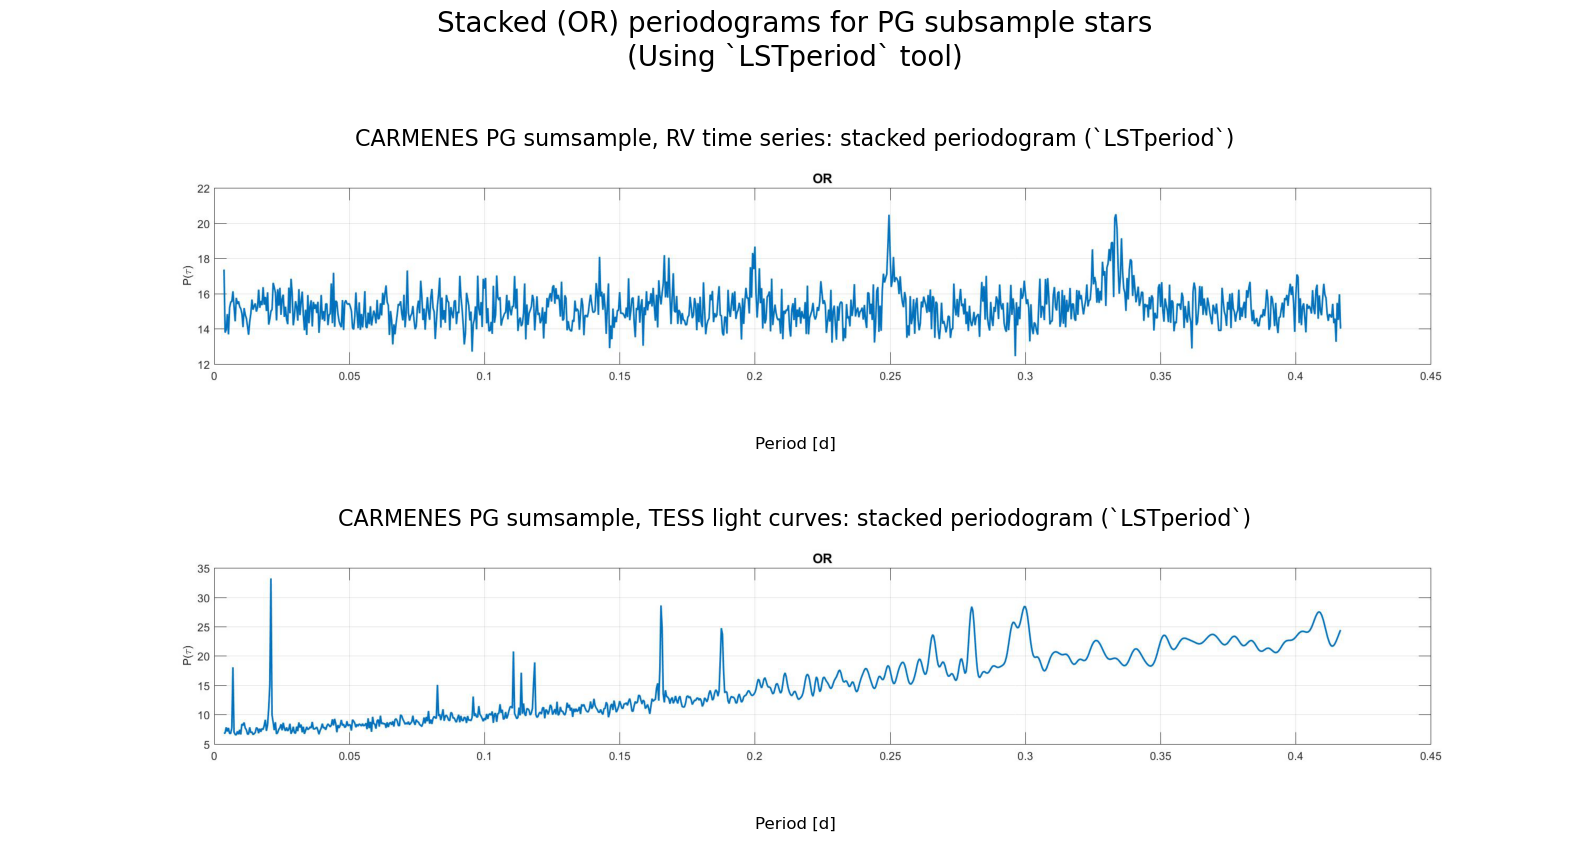

In [10]:
# Define combination parameters:
imgs = [IMG_1, IMG_2]
cut_boxes = [IMG_CUT_1, IMG_CUT_2]
img_titles = ["CARMENES PG sumsample, RV time series: stacked periodogram (`LSTperiod`)",
              "CARMENES PG sumsample, TESS light curves: stacked periodogram (`LSTperiod`)"]
comb_title = "Stacked (OR) periodograms for PG subsample stars\n(Using `LSTperiod` tool)"
xlabel = "Period [d]"
target_filename = IMG_FOLDER + "LSTPeriod_30_01_CARMENES_and_TESS_LSTPeriod.jpg"
comb_figsize = (16, 9)
combtitle_fontsize = 20
title_fontsize = 16
h_pad = None

# Combine:
v_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, xlabel=xlabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, h_pad=h_pad, figsize=comb_figsize, fig_filename=target_filename)


## Combine images of `stackedpg` for CARMENES and _TESS_

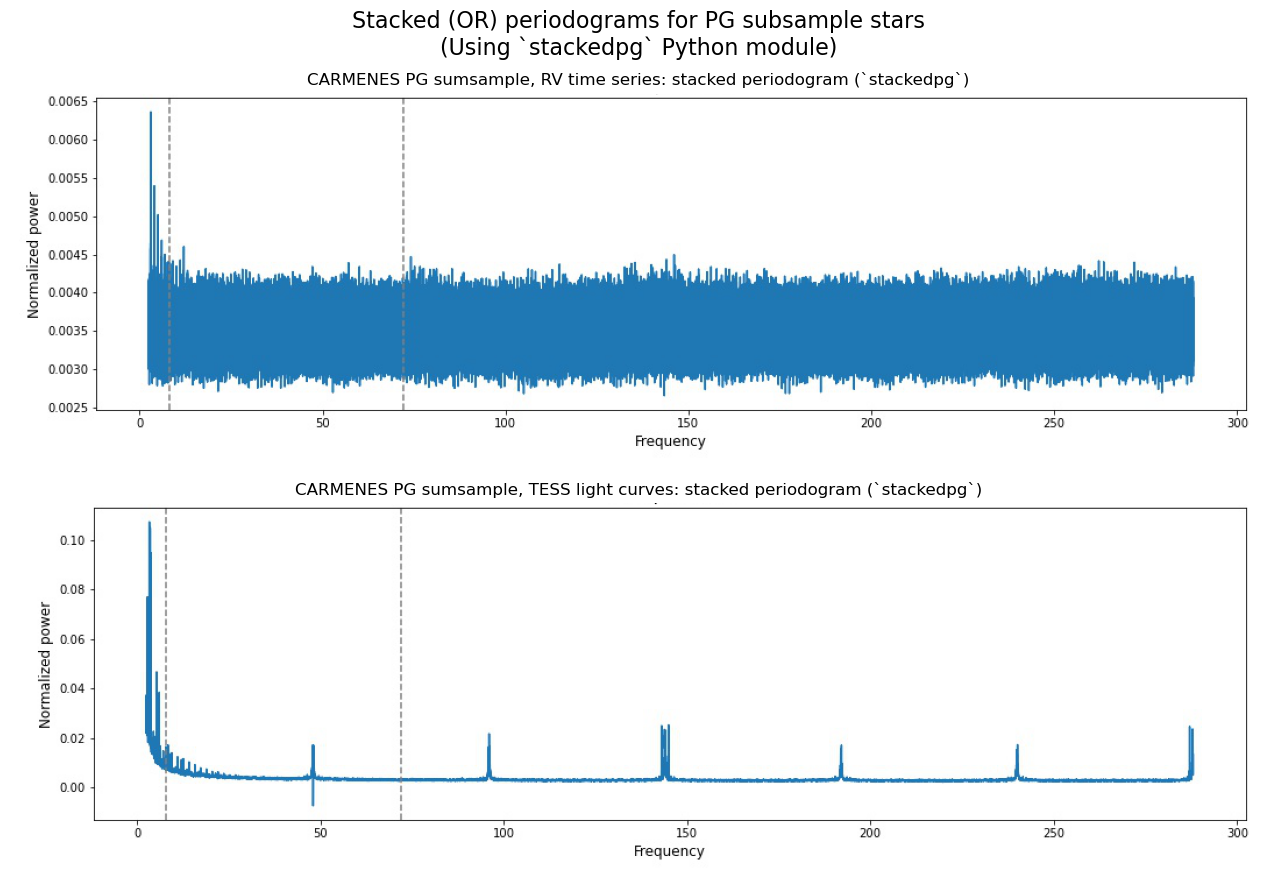

In [8]:
# Define combination parameters:
imgs = [IMG_3, IMG_4]
cut_boxes = [IMG_CUT_3, IMG_CUT_4]
img_titles = ["CARMENES PG sumsample, RV time series: stacked periodogram (`stackedpg`)",
              "CARMENES PG sumsample, TESS light curves: stacked periodogram (`stackedpg`)"]
comb_title = "Stacked (OR) periodograms for PG subsample stars\n(Using `stackedpg` Python module)"
xlabel = None
target_filename = IMG_FOLDER + "LSTPeriod_30_02_CARMENES_and_TESS_StackedPg.jpg"
comb_figsize = (16, 9)
combtitle_fontsize = 16
title_fontsize = 12
h_pad = None

# Combine:
v_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, xlabel=xlabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, h_pad=h_pad, figsize=comb_figsize, fig_filename=target_filename)


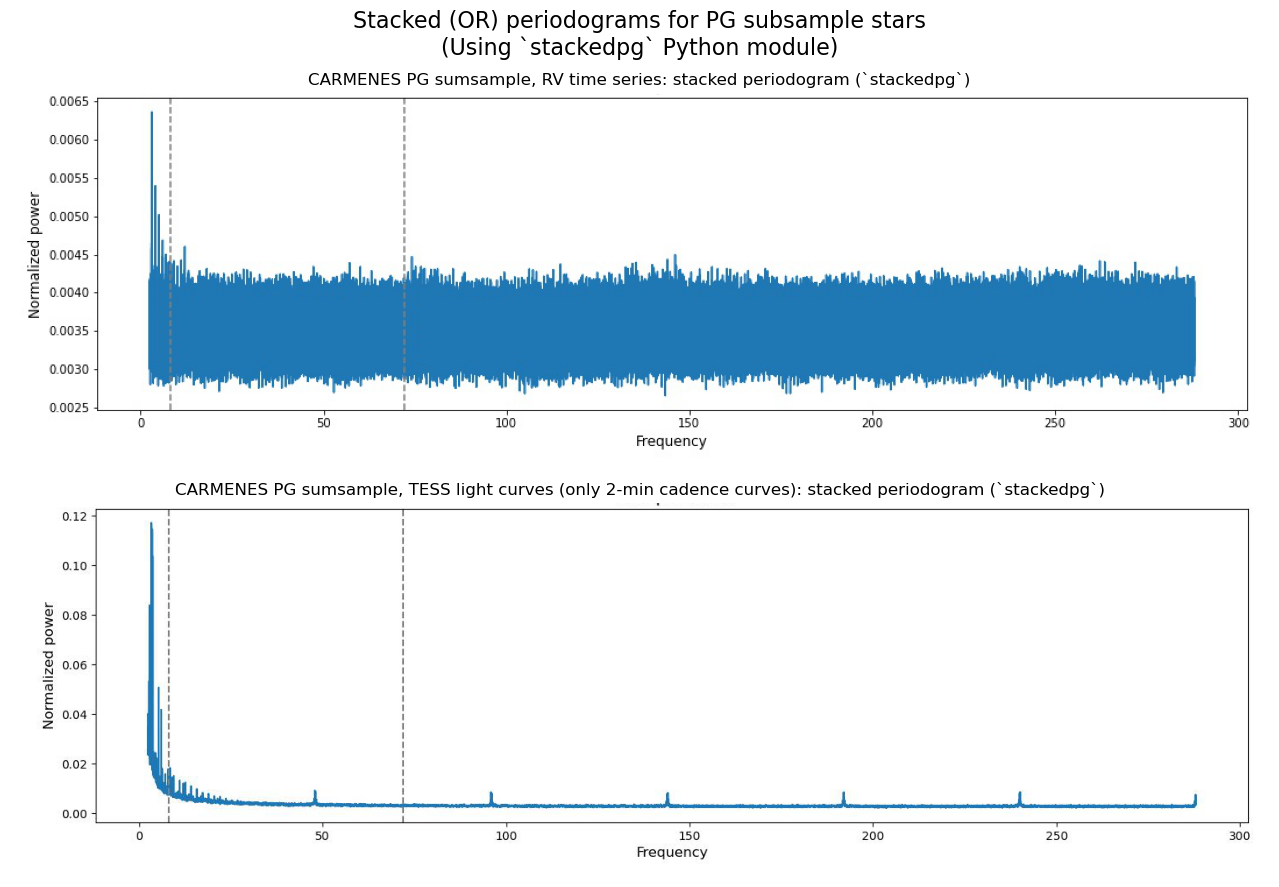

In [9]:
# Define combination parameters - CORRECTION, TESS WITHOUT THE 223 STARS WITH 30-min OR 10-min CADENCE CURVES:
imgs = [IMG_3, IMG_4C]
cut_boxes = [IMG_CUT_3, IMG_CUT_4C]
img_titles = ["CARMENES PG sumsample, RV time series: stacked periodogram (`stackedpg`)",
              "CARMENES PG sumsample, TESS light curves (only 2-min cadence curves): stacked periodogram (`stackedpg`)"]
comb_title = "Stacked (OR) periodograms for PG subsample stars\n(Using `stackedpg` Python module)"
xlabel = None
target_filename = IMG_FOLDER + "LSTPeriod_30_02C_CARMENES_and_TESS_StackedPg.jpg"
comb_figsize = (16, 9)
combtitle_fontsize = 16
title_fontsize = 12
h_pad = None

# Combine:
v_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, xlabel=xlabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, h_pad=h_pad, figsize=comb_figsize, fig_filename=target_filename)


## Combine images of `stackedpg` for S1, S2, S3 and S4 (300 objects for PG analysis)

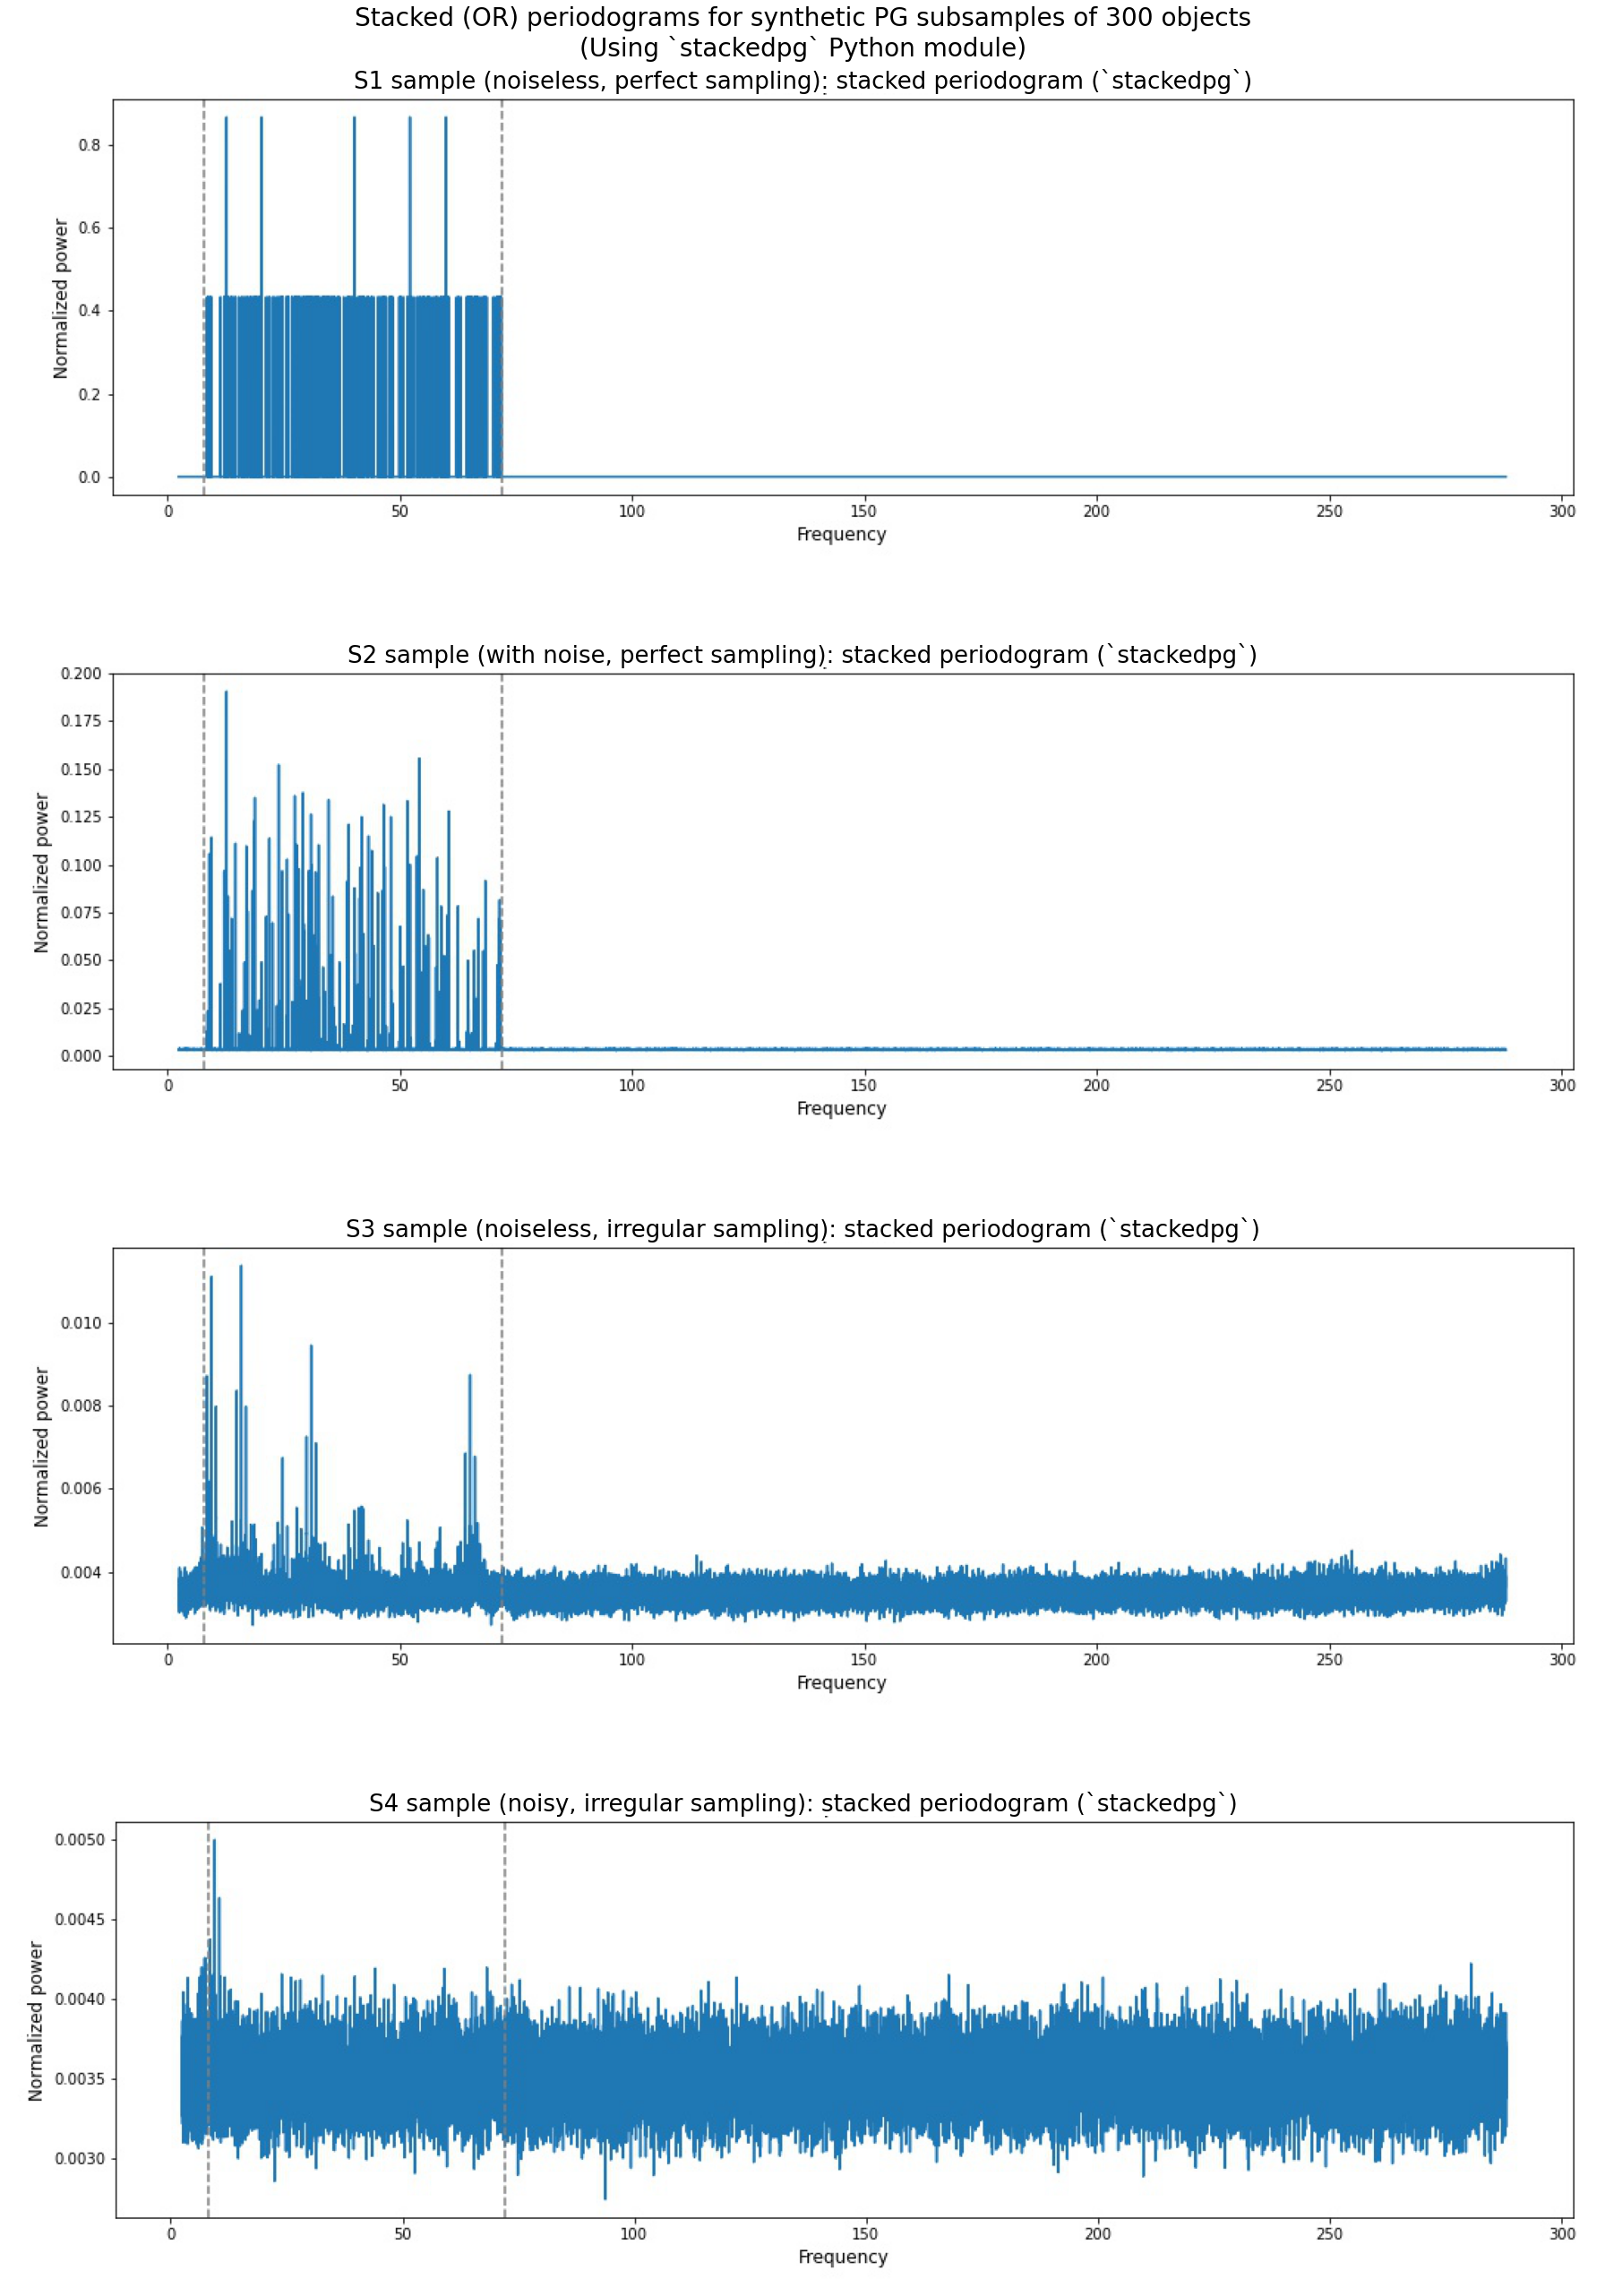

In [115]:
# Define combination parameters:
imgs = [IMG_5, IMG_6, IMG_7, IMG_8]
cut_boxes = [IMG_CUT_5, IMG_CUT_6, IMG_CUT_7, IMG_CUT_8]
img_titles = ["S1 sample (noiseless, perfect sampling): stacked periodogram (`stackedpg`)",
              "S2 sample (with noise, perfect sampling): stacked periodogram (`stackedpg`)",
              "S3 sample (noiseless, irregular sampling): stacked periodogram (`stackedpg`)",
              "S4 sample (noisy, irregular sampling): stacked periodogram (`stackedpg`)"]
comb_title = "Stacked (OR) periodograms for synthetic PG subsamples of 300 objects\n(Using `stackedpg` Python module)"
xlabel = None
target_filename = IMG_FOLDER + "LSTPeriod_30_03_S1_S2_S3_and_S4_StackedPg.jpg"
comb_figsize = (25, 37)
combtitle_fontsize = 28
title_fontsize = 26
h_pad = 0.5

# Combine:
v_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, xlabel=xlabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, h_pad=h_pad, figsize=comb_figsize, fig_filename=target_filename)


### In two parts

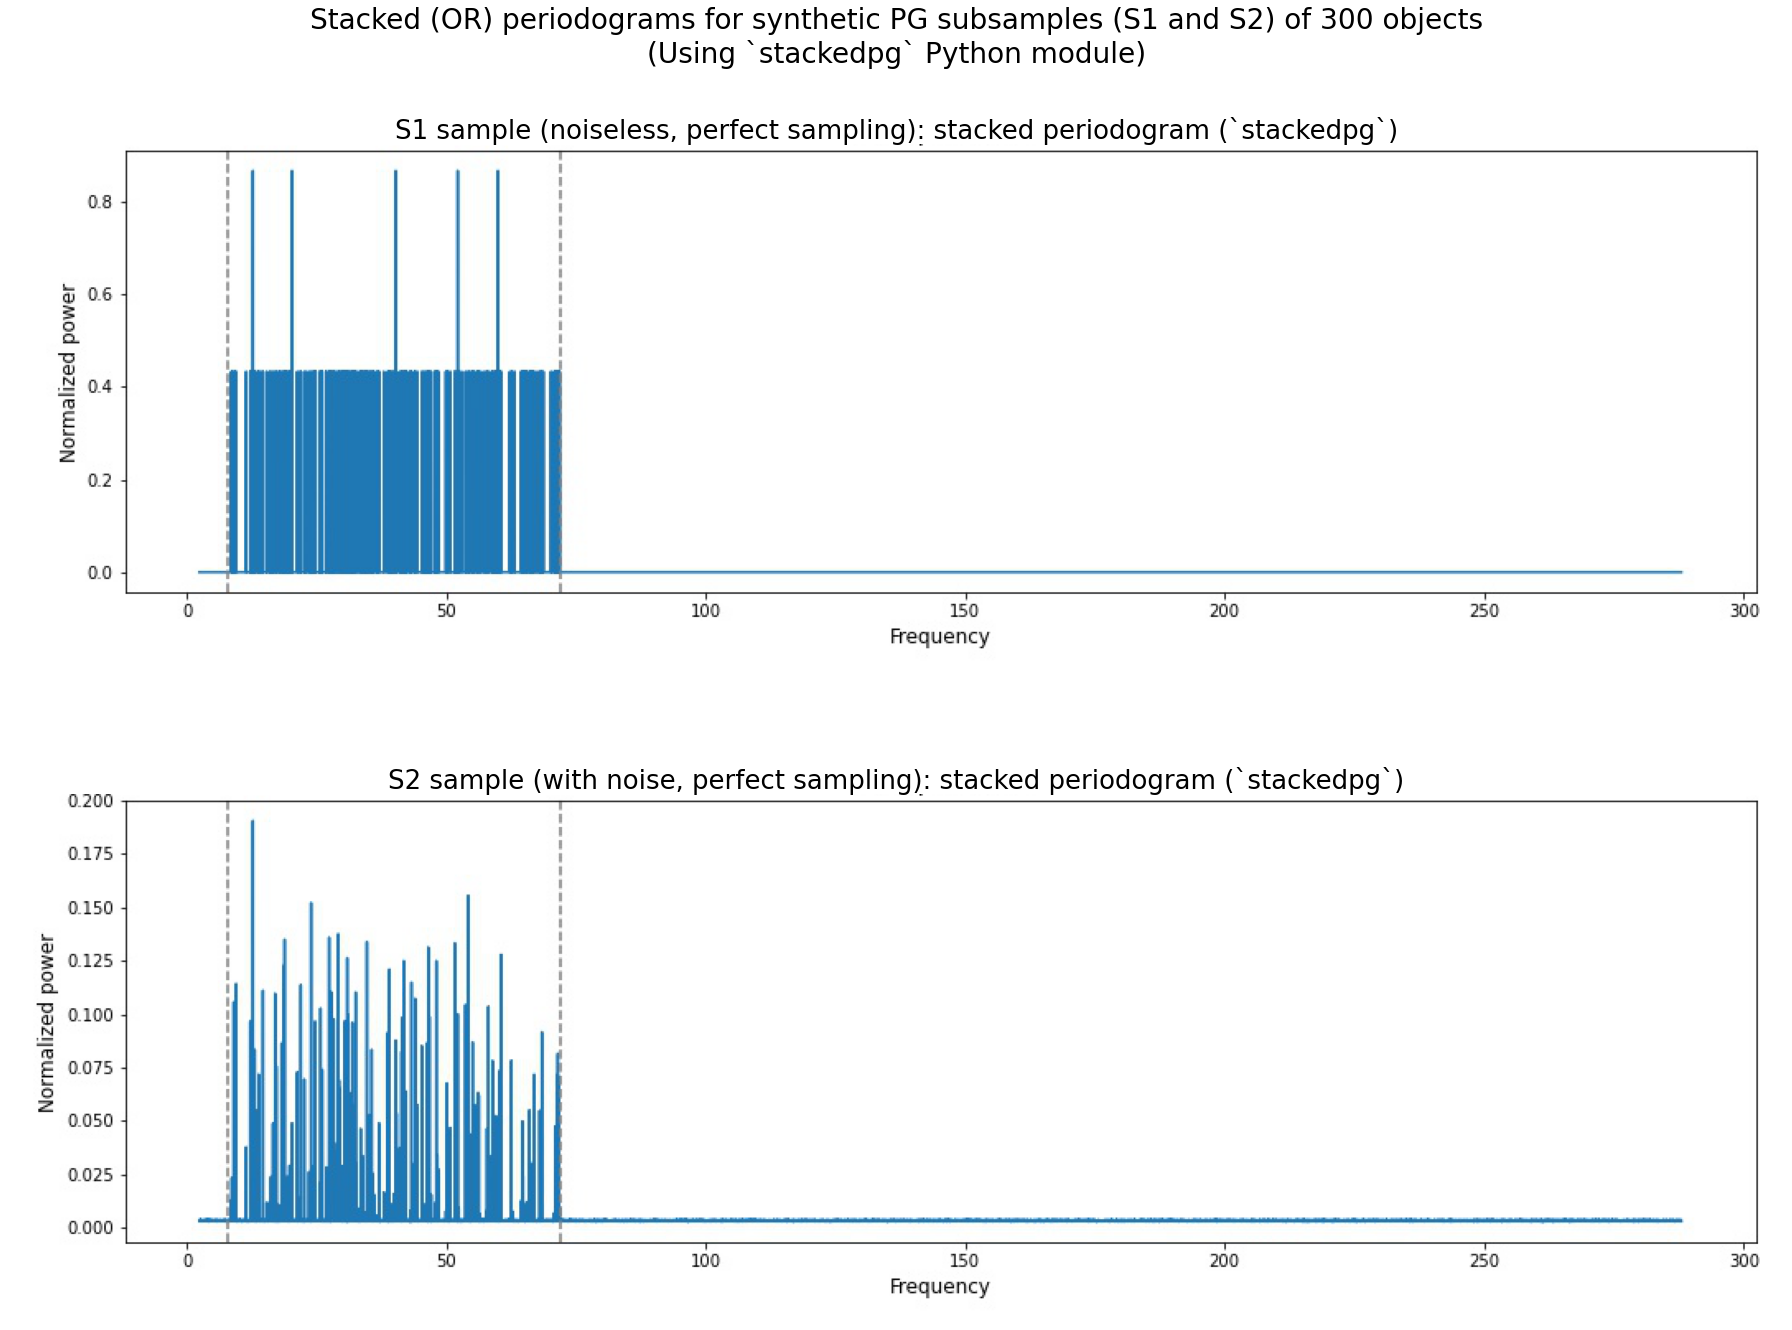

In [116]:
# Define combination parameters:
imgs = [IMG_5, IMG_6]
cut_boxes = [IMG_CUT_5, IMG_CUT_6]
img_titles = ["S1 sample (noiseless, perfect sampling): stacked periodogram (`stackedpg`)",
              "S2 sample (with noise, perfect sampling): stacked periodogram (`stackedpg`)"]
comb_title = "Stacked (OR) periodograms for synthetic PG subsamples (S1 and S2) of 300 objects\n(Using `stackedpg` Python module)"
xlabel = None
target_filename = IMG_FOLDER + "LSTPeriod_30_03B_S1_and_S2_StackedPg.jpg"
comb_figsize = (25, 20)
combtitle_fontsize = 28
title_fontsize = 26
h_pad = 0.5

# Combine:
v_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, xlabel=xlabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, h_pad=h_pad, figsize=comb_figsize, fig_filename=target_filename)


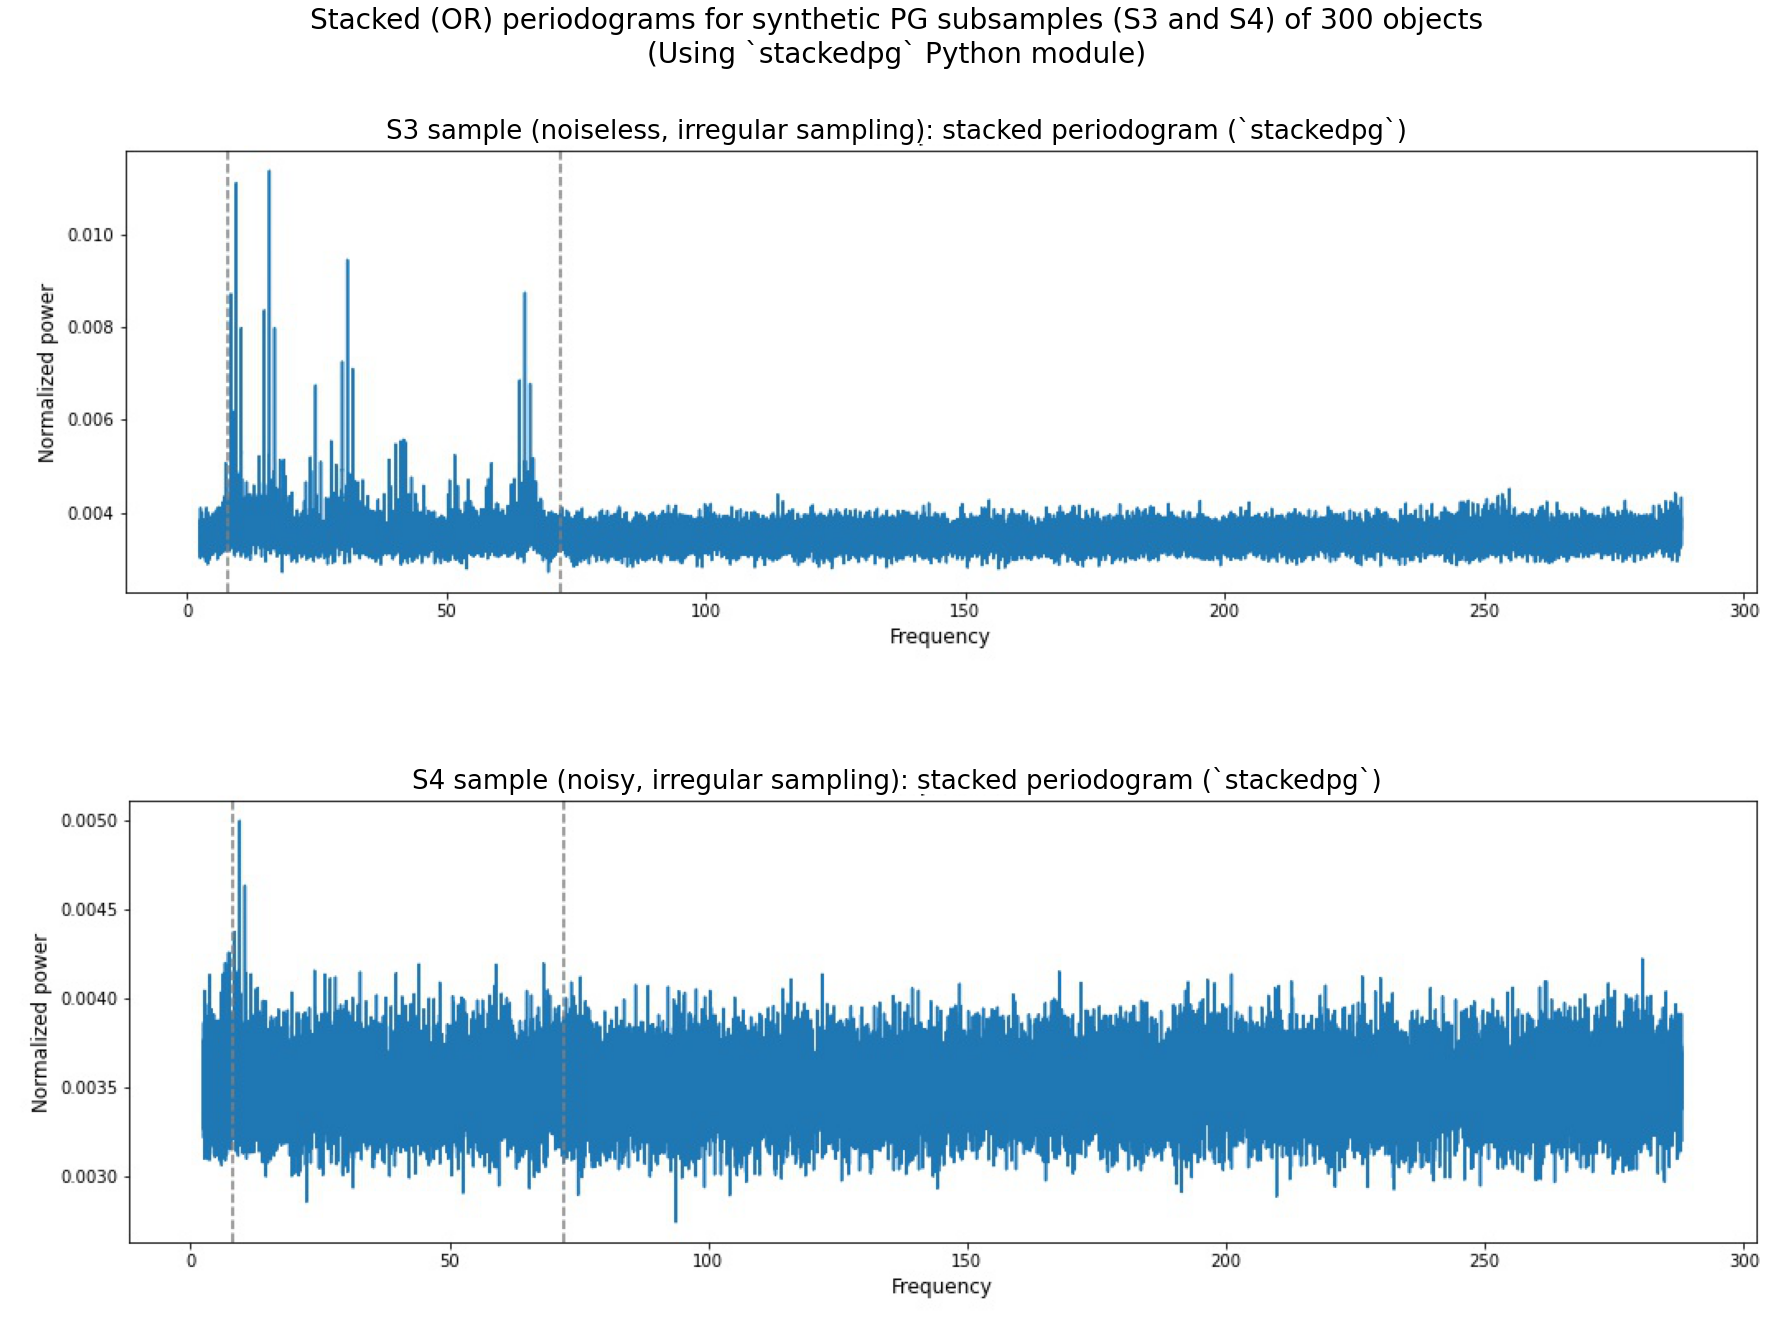

In [117]:
# Define combination parameters:
imgs = [IMG_7, IMG_8]
cut_boxes = [IMG_CUT_7, IMG_CUT_8]
img_titles = ["S3 sample (noiseless, irregular sampling): stacked periodogram (`stackedpg`)",
              "S4 sample (noisy, irregular sampling): stacked periodogram (`stackedpg`)"]
comb_title = "Stacked (OR) periodograms for synthetic PG subsamples (S3 and S4) of 300 objects\n(Using `stackedpg` Python module)"
xlabel = None
target_filename = IMG_FOLDER + "LSTPeriod_30_03C_S3_and_S4_StackedPg.jpg"
comb_figsize = (25, 20)
combtitle_fontsize = 28
title_fontsize = 26
h_pad = 0.5

# Combine:
v_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, xlabel=xlabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, h_pad=h_pad, figsize=comb_figsize, fig_filename=target_filename)


## Combine images of PCA results

In [5]:
IMG_FOLDER_PCA = "../02_06_MachineLearning/img/"

### Cumulative variance explained

<Figure size 2500x1000 with 0 Axes>

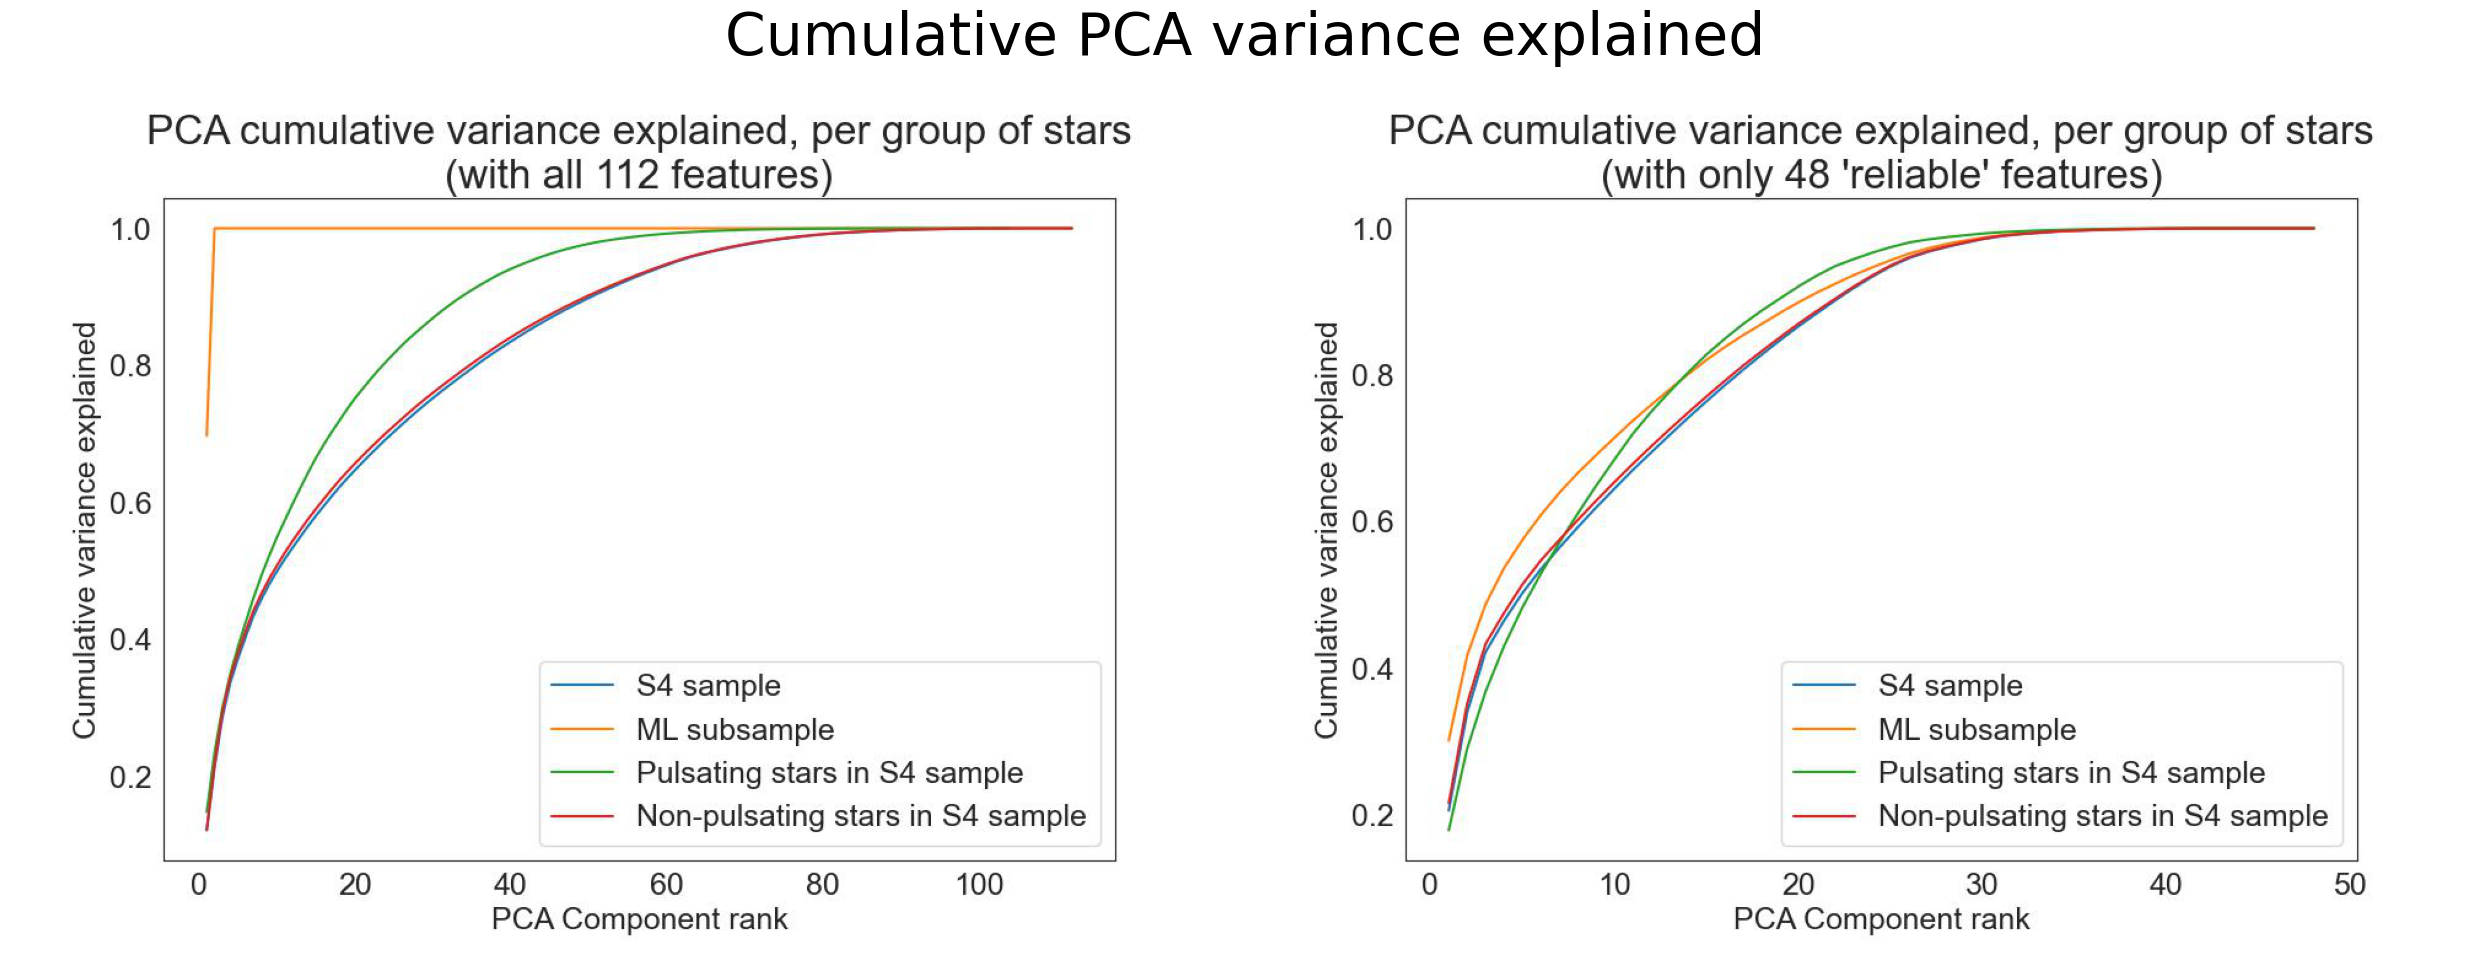

In [11]:
# Define combination parameters:
IMG10 = "../02_06_MachineLearning/img/ML_20_21ALL_S4MLPNPComp_AllFeat_CumVarianceExplained.jpg"
IMG_CUT_10 = (0, 0, 1, 1)
IMG11 = "../02_06_MachineLearning/img/ML_20_22ALL_S4MLPNPComp_RelFeat_CumVarianceExplained.jpg"
IMG_CUT_11 = (0, 0, 1, 1)

imgs = [IMG10, IMG11]
cut_boxes = [IMG_CUT_10, IMG_CUT_11]
img_titles = None
comb_title = "Cumulative PCA variance explained"
ylabel = None
target_filename = None
target_filename = IMG_FOLDER_PCA + "PCA_CumulativeVariance_CombinedFigure.jpg"
comb_figsize = (25, 10)
combtitle_fontsize = 42
title_fontsize = 26
w_pad = None

# Combine:
h_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, ylabel=ylabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, w_pad=w_pad, figsize=comb_figsize, fig_filename=target_filename)

### Dot products of eigenvectors

<Figure size 2500x1000 with 0 Axes>

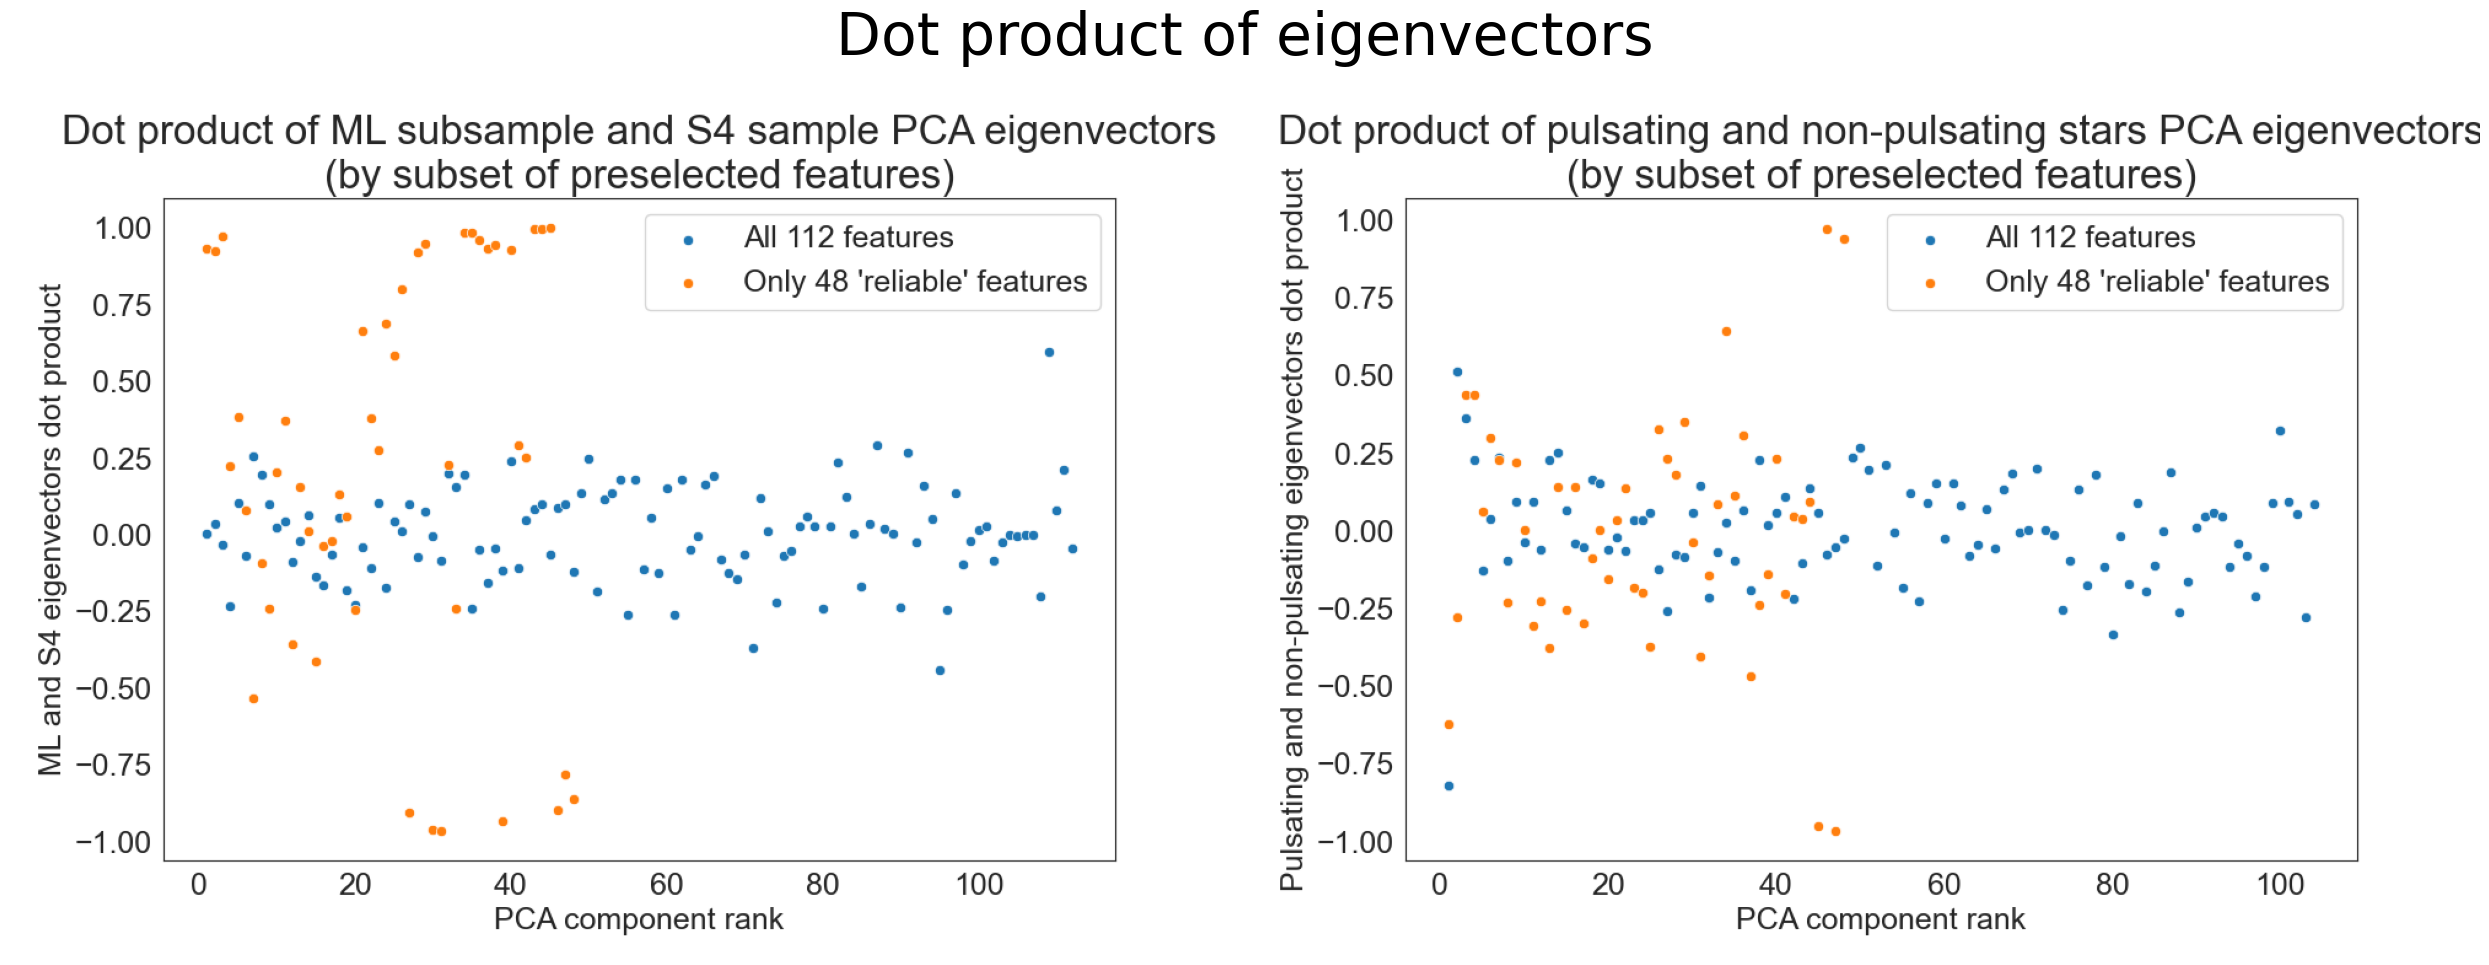

In [14]:
# Define combination parameters:
IMG12 = "../02_06_MachineLearning/img/ML_20_25_PCA_AllRelComp_Eigenvectors_Rank_vs_DotProduct.jpg"
IMG_CUT_12 = (0, 0, 1, 1)
IMG13 = "../02_06_MachineLearning/img/ML_20_25PNP_PCA_AllRelComp_Eigenvectors_Rank_vs_DotProduct.jpg"
IMG_CUT_13 = (0, 0, 1, 1)

imgs = [IMG12, IMG13]
cut_boxes = [IMG_CUT_11, IMG_CUT_13]
img_titles = None
comb_title = "Dot product of eigenvectors"
ylabel = None
target_filename = None
target_filename = IMG_FOLDER_PCA + "PCA_EigenvectorsDotProduct_CombinedFigure.jpg"
comb_figsize = (25, 10)
combtitle_fontsize = 42
title_fontsize = 26
w_pad = None

# Combine:
h_combine_images(image_files=imgs, crop_box_ratios=cut_boxes, image_titles=img_titles,
                 combined_title=comb_title, ylabel=ylabel, combtitle_fontsize=combtitle_fontsize,
                 title_fontsize=title_fontsize, w_pad=w_pad, figsize=comb_figsize, fig_filename=target_filename)